In [524]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [525]:
data_train = pd.read_csv('Inputs/train.csv')
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [526]:
data_train.replace(['female', 'male'], [0, 1], inplace=True)
data_train.fillna(0, inplace=True)
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,C


In [527]:
X = np.array(data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])
Y = np.array(data_train[['Survived']])

# ***Model:***

---


* **Implement a Multi Layer Perceptron Neural Network for this classification task**

In [528]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((712, 6), (179, 6), (712, 1), (179, 1))

In [529]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'), # input layer
    tf.keras.layers.Dense(60, activation='relu'), # hidden layer 1
    tf.keras.layers.Dense(30, activation='sigmoid'), # hidden layer 2
    tf.keras.layers.Dense(2, activation='softmax'), # output layer
])

In [530]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics= ['accuracy'])

* **Fit your model on train dataset**

In [531]:
output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200


23/23 [==============================] - 1s 2ms/step - loss: 0.6994 - accuracy: 0.5604
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6152
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6208
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6147 - accuracy: 0.6362
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.6615
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6601
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6419
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.6840
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.6840
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.6713
Epoch 11/200
23/23 [=

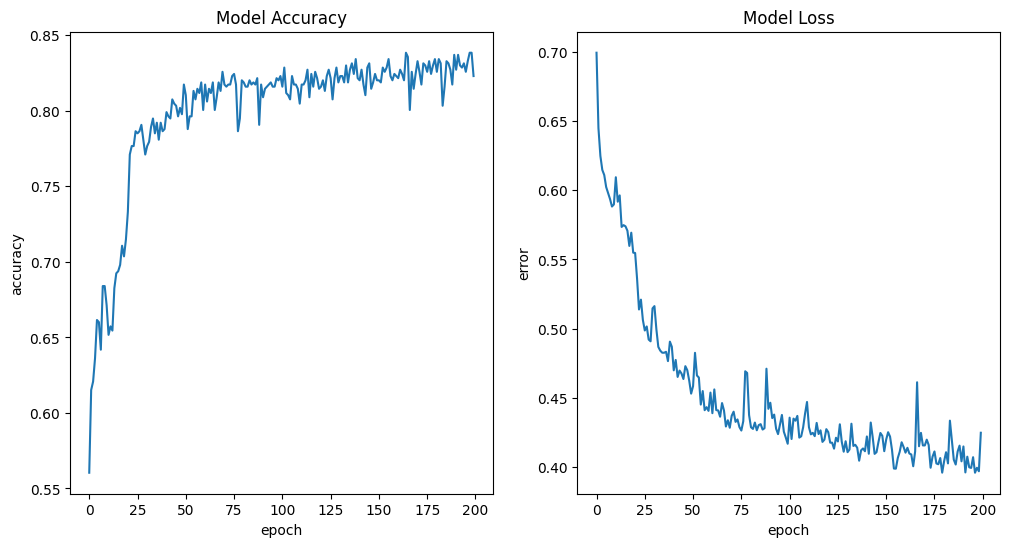

In [532]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(output.history['accuracy'])
ax1.set_title("Model Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("accuracy")

ax2.plot(output.history['loss'])
ax2.set_title("Model Loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("error")
plt.show()

* **Evaluate your model on test dataset (You should achieve an accuracy > 90%)**

In [533]:
results = model.evaluate(X_test, Y_test)
results

6/6 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8212


[0.4212866723537445, 0.8212290406227112]

* **Calculate precision and recall**

In [534]:
from sklearn.metrics import precision_score, recall_score

In [535]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred = Y_pred.reshape(-1, 1)

6/6 [==============================] - 0s 1ms/step


In [536]:
precision = precision_score(Y_test, Y_pred, average= "binary")
recall = recall_score(Y_test, Y_pred, average= "binary")

In [537]:
print('precision : ', precision)
print('recall : ', recall)

precision :  0.8305084745762712
recall :  0.6901408450704225


* **Predict your model on Jack and Rose data**

In [538]:
Jack = np.array([[1, 1, 23, 0, 0, 10.2000]])
Rose = np.array([[1, 0, 22, 0, 0, 10.2000]])

Jack_status = np.argmax(model.predict(Jack))
Rose_status = np.argmax(model.predict(Rose))

Jack_status, Rose_status

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


(0, 1)

* **Fill the following table**

|Algorithm|Accuracy|
|---|---|
|KNN|  |
|Perceptron|  |
|MLP|  |

___
kNN

In [539]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors = 5)

In [540]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [541]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)
Y_pred = Y_pred.reshape(-1, 1)

6/6 [==============================] - 0s 2ms/step


In [542]:
accuracy = np.mean(Y_pred == Y_test)
accuracy

0.8212290502793296

Perceptron

In [543]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='sigmoid'), # input layer
    tf.keras.layers.Dense(2, activation='softmax'), # output layer
])

In [544]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics= ['accuracy'])

In [545]:
output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200


23/23 [==============================] - 1s 1ms/step - loss: 0.6445 - accuracy: 0.6222
Epoch 2/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6113 - accuracy: 0.6629
Epoch 3/200
23/23 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.6910
Epoch 4/200
23/23 [==============================] - 0s 1ms/step - loss: 0.5829 - accuracy: 0.6980
Epoch 5/200
23/23 [==============================] - 0s 1ms/step - loss: 0.5726 - accuracy: 0.6966
Epoch 6/200
23/23 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.7022
Epoch 7/200
23/23 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7149
Epoch 8/200
23/23 [==============================] - 0s 1ms/step - loss: 0.5454 - accuracy: 0.7289
Epoch 9/200
23/23 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7163
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.7303
Epoch 11/200
23/23 [=

In [546]:
_, accuracy = model.evaluate(X_test, Y_test)
accuracy

6/6 [==============================] - 1s 2ms/step - loss: 0.3874 - accuracy: 0.8212


0.8212290406227112